# Handling missing value

Missing value in a dataset is a very common phenomenon in reality. For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

Missing value correction is required to reduce bias and to produce powerful suitable models. Most of the algorithms can’t handle missing data, thus you need to act in some way to simply not let your code crash

### Detection of Missing Data

#### With Python Code

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/dataset/main/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### With Visulization also we can detect there is missing value or not

<AxesSubplot:>

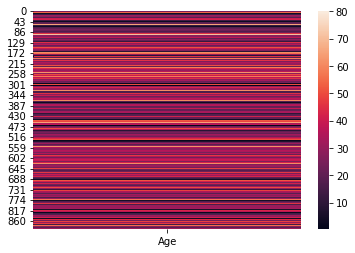

In [9]:
sns.heatmap(pd.DataFrame(df['Age']))

In [10]:
import missingno as msno

<AxesSubplot:>

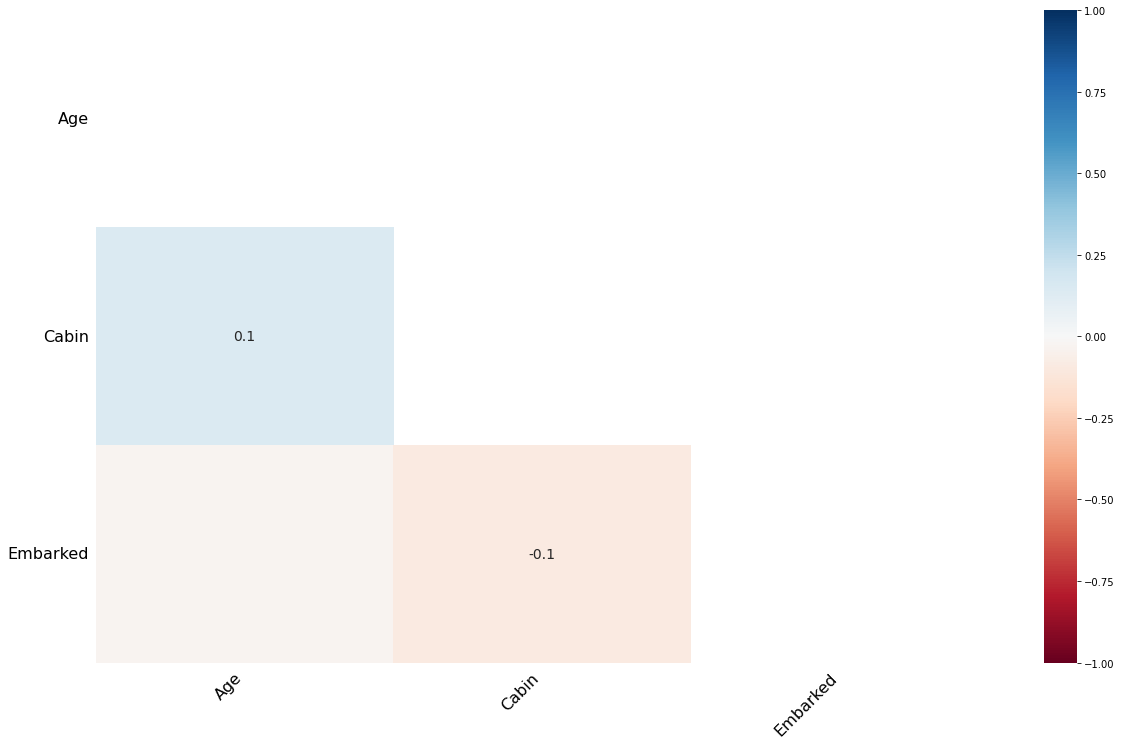

In [11]:
msno.heatmap(df)

#### Bar Chart

<AxesSubplot:>

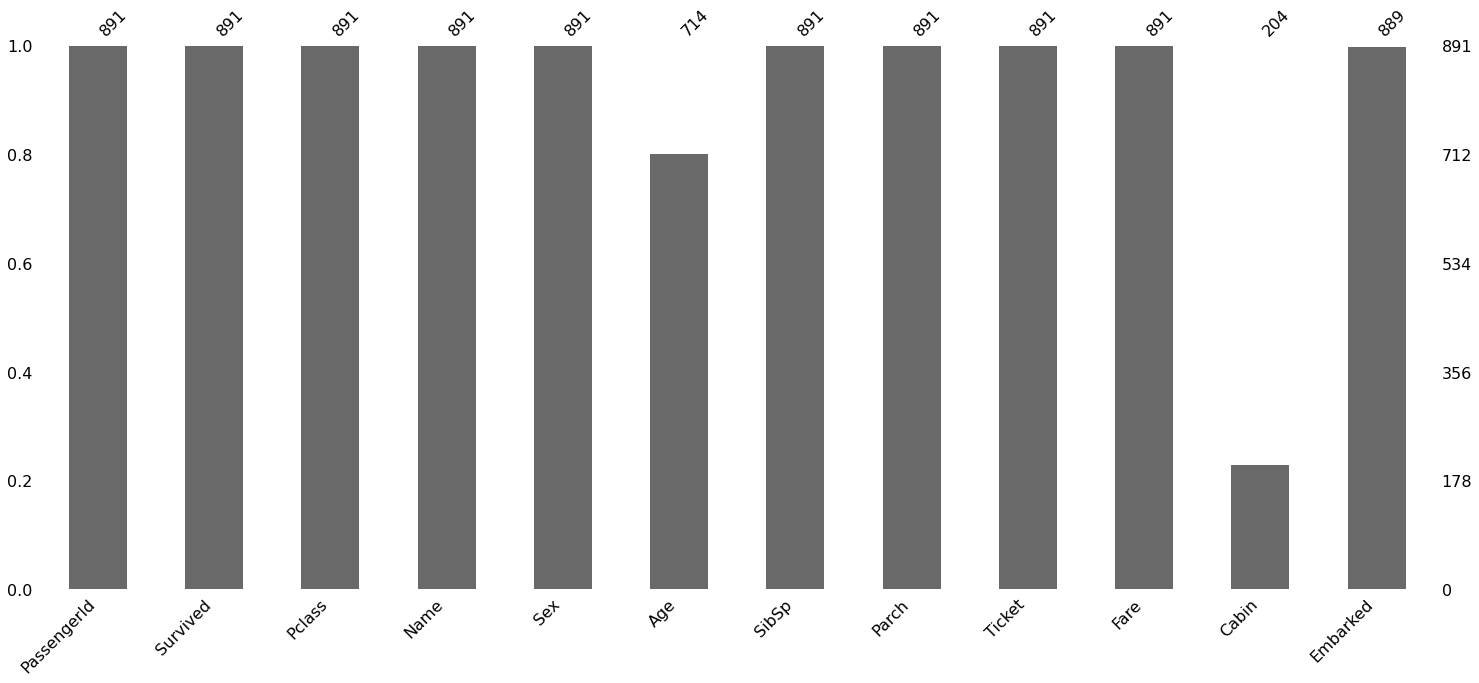

In [15]:
msno.bar(df)

#### Matrix

<AxesSubplot:>

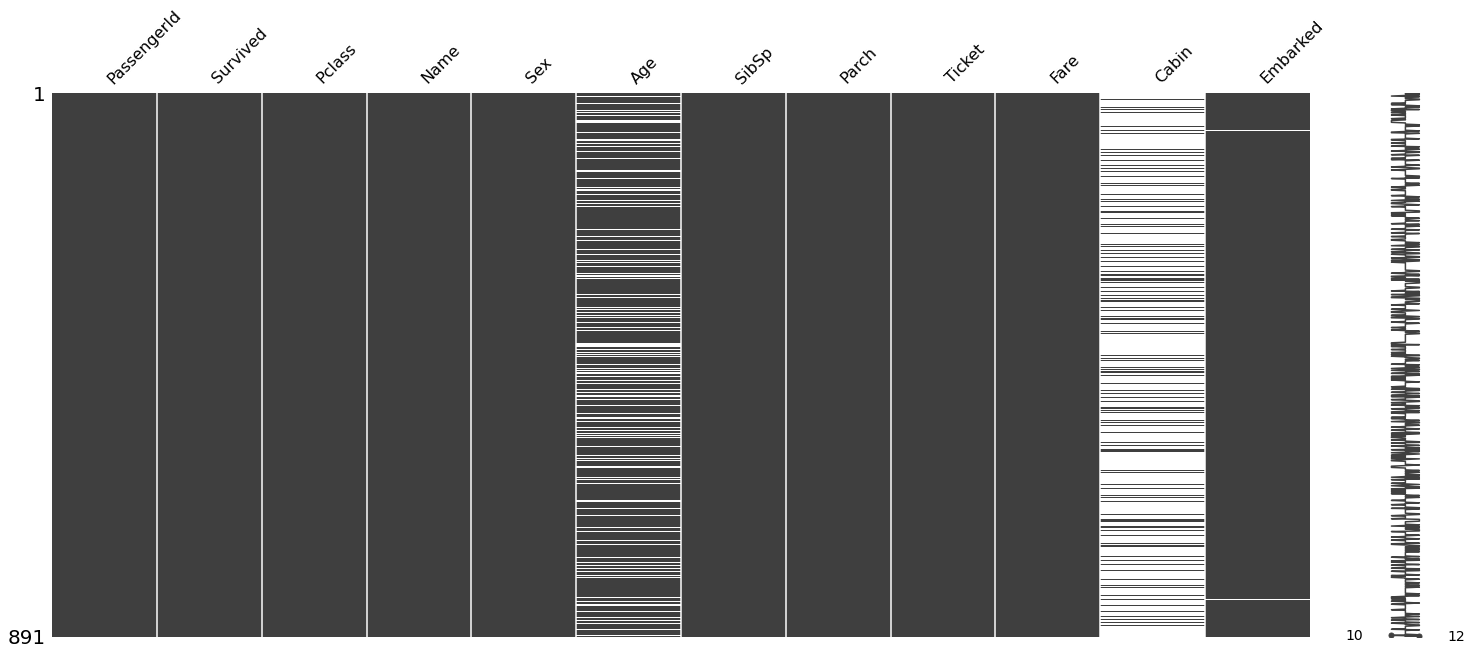

In [17]:
msno.matrix(df)

### Method for handling missing values

1.Filling with Arbitrary value or Replace NaN with a Scalar Value

2.Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

3.Drop Missing Values

4.statical method

  - mean 

  - median 

  - mode

## Filling with Arbitrary value or Replace NaN with a Scalar Value

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [26]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [27]:
def impute_nan(df,variable):
    df[variable+'_zeros'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

In [28]:
impute_nan(df,'Age')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [30]:
impute_nan(df,'Cabin')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100


### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

In [32]:
def impute_nan(df, variable):
    df[variable+'_pfill']=df[variable].fillna(method='pad')
    df[variable+'_bfill']=df[variable].fillna(method='backfill')

In [33]:
impute_nan(df,'Cabin')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100,C123,E46


In [36]:
impute_nan(df,"Age")

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill,Age_pfill,Age_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100,NaN,C85,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85,C85,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100,C85,C123,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123,C123,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100,C123,E46,35.0,35.0


<AxesSubplot:>

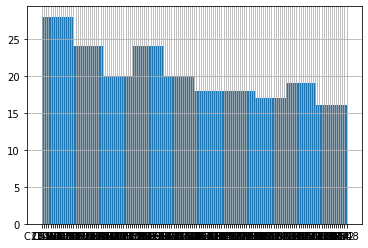

In [38]:
df['Cabin'].hist()

<AxesSubplot:>

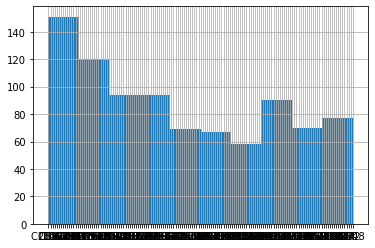

In [39]:
df['Cabin_pfill'].hist()

In [40]:
df["Cabin_pfill"]

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin_pfill, Length: 891, dtype: object

Notice, values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

### Advantages

- Easy to implement
- Working fine with small data and less missing values

### Disadvantages

- Distorts the original distribution of the variable
- values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

## Drop Missing Values
If you want to simply exclude the missing values, then use the dropna function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill,Age_pfill,Age_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100,NaN,C85,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85,C85,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100,C85,C123,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123,C123,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100,C123,E46,35.0,35.0


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Age_zeros      891 non-null    float64
 13  Age_hundred    891 non-null    float64
 14  Cabin_zeros    891 non-null    object 
 15  Cabin_hundred  891 non-null    object 
 16  Cabin_pfill    890 non-null    object 
 17  Cabin_bfill    890 non-null    object 
 18  Age_pfill 

In [44]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_zeros          0
Age_hundred        0
Cabin_zeros        0
Cabin_hundred      0
Cabin_pfill        1
Cabin_bfill        1
Age_pfill          0
Age_bfill          0
dtype: int64

In [45]:
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Age_pfill,Age_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,22.0,0,100,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,38.0,C85,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,26.0,0,100,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,35.0,C123,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,35.0,0,100,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,27.0,27.0,0,100,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,19.0,19.0,B42,B42,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,0.0,100.0,0,100,19.0,26.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,26.0,26.0,C148,C148,26.0,26.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Age_zeros      891 non-null    float64
 13  Age_hundred    891 non-null    float64
 14  Cabin_zeros    891 non-null    object 
 15  Cabin_hundred  891 non-null    object 
 16  Cabin_pfill    890 non-null    object 
 17  Cabin_bfill    890 non-null    object 
 18  Age_pfill 

### Advantages
- Easy To implement
- If data is missing for more than given threshold(it may 50% or 60% or 70%)of the observations, it may be wise to discard it if the variable is insignificant.

### Disadvantage
- reduced statistical power (because it reduces the number of samples n, the estimates will have larger standard errors)
- waste of information in data

## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill,Age_pfill,Age_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100,NaN,C85,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85,C85,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100,C85,C123,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123,C123,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100,C123,E46,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,0,100,C50,B42,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,B42,B42,B42,B42,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,100.0,0,100,B42,C148,19.0,26.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,C148,C148,C148,C148,26.0,26.0


In [50]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_zeros          0
Age_hundred        0
Cabin_zeros        0
Cabin_hundred      0
Cabin_pfill        1
Cabin_bfill        1
Age_pfill          0
Age_bfill          0
dtype: int64

In [51]:
df.isnull().mean()

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245
Age_zeros        0.000000
Age_hundred      0.000000
Cabin_zeros      0.000000
Cabin_hundred    0.000000
Cabin_pfill      0.001122
Cabin_bfill      0.001122
Age_pfill        0.000000
Age_bfill        0.000000
dtype: float64

In [52]:
df['Age'].isnull().sum()

177

In [53]:
#taken a random values(taken 177 random values)
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions

In [54]:
#index number of the null values hold row
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

### Advantages
- Easy To implement
- There is less distortion in variance

### Disadvantage
- Every situation randomness wont work

## Mean/ Median /Mode imputation

### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore, these methods are suitable for continuous and discrete numerical variables only.

### Assumptions:

1. Data is missing completely at random (MCAR)
2. The missing observations, most likely look like the majority of the observations in the variable (aka, the mean/median)
3. If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution
4. Whenever we have a outlier in the data we prefer median and mode.

If a variable is normally distributed, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for numerical variables

If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill,Age_pfill,Age_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,100,NaN,C85,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85,C85,C85,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,100,C85,C123,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123,C123,C123,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,100,C123,E46,35.0,35.0


In [56]:
df.isnull().mean()

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245
Age_zeros        0.000000
Age_hundred      0.000000
Cabin_zeros      0.000000
Cabin_hundred    0.000000
Cabin_pfill      0.001122
Cabin_bfill      0.001122
Age_pfill        0.000000
Age_bfill        0.000000
dtype: float64

In [57]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [59]:
median=df.Age.median()

In [61]:
impute_nan(df,'Age',median)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Age_zeros,Age_hundred,Cabin_zeros,Cabin_hundred,Cabin_pfill,Cabin_bfill,Age_pfill,Age_bfill,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,22.0,22.0,0,100,NaN,C85,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,38.0,38.0,C85,C85,C85,C85,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,26.0,26.0,0,100,C85,C123,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,35.0,35.0,C123,C123,C123,C123,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,35.0,35.0,0,100,C123,E46,35.0,35.0,35.0


In [64]:
print(df['Age'].std())

14.526497332334044


In [65]:
print(df['Age_median'].std())

13.019696550973194


### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages

- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset
- Can be integrated into production (during model deployment).

#### Disadvantages

- Change or Distortion in the original variance
- Impacts Correlation
- Distortion of the original variance.

## Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [68]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [69]:
df['Age_NAN']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Age_NAN, Length: 891, dtype: int32

In [70]:
df['Age_NAN'].value_counts()

0    714
1    177
Name: Age_NAN, dtype: int64

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)